In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates


In [2]:
exchange_rates = pd.read_csv('euro-daily-hist_1999_2020.csv')

In [3]:
exchange_rates.head()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2021-01-08,1.5758,1.9558,6.5748,1.5543,1.0827,7.9184,NaN,26.163,7.4369,...,4.8708,90.8000,10.0510,1.6228,NaN,NaN,36.8480,9.0146,1.2250,18.7212
1,2021-01-07,1.5836,1.9558,6.5172,1.5601,1.0833,7.9392,NaN,26.147,7.4392,...,4.8712,91.2000,10.0575,1.6253,NaN,NaN,36.8590,8.9987,1.2276,18.7919
2,2021-01-06,1.5824,1.9558,6.5119,1.5640,1.0821,7.9653,NaN,26.145,7.4393,...,4.8720,90.8175,10.0653,1.6246,NaN,NaN,36.9210,9.0554,1.2338,18.5123
3,2021-01-05,1.5927,1.9558,6.5517,1.5651,1.0803,7.9315,NaN,26.227,7.4387,...,4.8721,91.6715,10.0570,1.6180,NaN,NaN,36.7760,9.0694,1.2271,18.4194
4,2021-01-04,1.5928,1.9558,6.3241,1.5621,1.0811,7.9484,NaN,26.141,7.4379,...,4.8713,90.3420,10.0895,1.6198,NaN,NaN,36.7280,9.0579,1.2296,17.9214


In [4]:
exchange_rates.tail()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
5694,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855
5695,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
5696,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
5697,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
5698,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,...,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358


There are 5,699 rows of data and 41 columns. Each column is a float.
There seem to be some null values from further back in 1999 in the columns for Bulgaria and Brazil.

In [5]:
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar',
                               'Period\\Unit:': 'Time'},
                      inplace=True)
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)

In [6]:
euro_to_dollar = exchange_rates[['Time', 'US_dollar']]

In [7]:
euro_to_dollar.head()

,Time,US_dollar
0,1999-01-04,1.1789
1,1999-01-05,1.1790
2,1999-01-06,1.1743
3,1999-01-07,1.1632
4,1999-01-08,1.1659


In [8]:
euro_to_dollar['US_dollar'].value_counts()

-         62
1.2276     9
1.1215     8
1.1305     7
1.1346     6
          ..
1.0537     1
0.8630     1
1.0642     1
0.8782     1
1.1629     1
Name: US_dollar, Length: 3528, dtype: int64

The '-' character should not appear in a dataset concerning dollar amounts. 

In [9]:
euro_to_dollar_clean = euro_to_dollar[euro_to_dollar['US_dollar'] != '-']

In [10]:
euro_to_dollar_clean['US_dollar'].value_counts()

1.2276    9
1.1215    8
1.1305    7
1.1193    6
1.1346    6
         ..
1.0368    1
1.0537    1
0.8630    1
1.0642    1
1.1629    1
Name: US_dollar, Length: 3527, dtype: int64

In [11]:
euro_to_dollar = euro_to_dollar_clean

In [12]:
euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype(float)

In [13]:
euro_to_dollar.head()

,Time,US_dollar
0,1999-01-04,1.1789
1,1999-01-05,1.1790
2,1999-01-06,1.1743
3,1999-01-07,1.1632
4,1999-01-08,1.1659


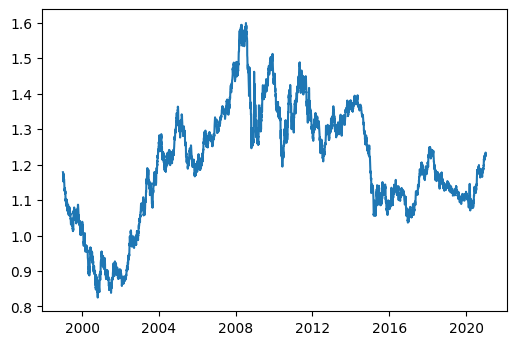

In [14]:
plt.plot(euro_to_dollar['Time'],
         euro_to_dollar['US_dollar'])
plt.show()

In [15]:
euro_to_dollar['rolling_mean'] = euro_to_dollar['US_dollar'].rolling(30).mean()
euro_to_dollar.tail()

,Time,US_dollar,rolling_mean
5694,2021-01-04,1.2296,1.211170
5695,2021-01-05,1.2271,1.212530
5696,2021-01-06,1.2338,1.213987
5697,2021-01-07,1.2276,1.215357
5698,2021-01-08,1.2250,1.216557


# Delving into how the euro-dollar rate changed during the 2007-2008 financial crisis. 

In [16]:
df = euro_to_dollar[(euro_to_dollar['Time'] > '2005-12-31') & (euro_to_dollar['Time'] < '2010-01-01')]
print(df.head())

           Time  US_dollar  rolling_mean
1825 2006-01-02     1.1826      1.183087
1826 2006-01-03     1.1875      1.183300
1827 2006-01-04     1.2083      1.184573
1828 2006-01-05     1.2088      1.185613
1829 2006-01-06     1.2093      1.186647


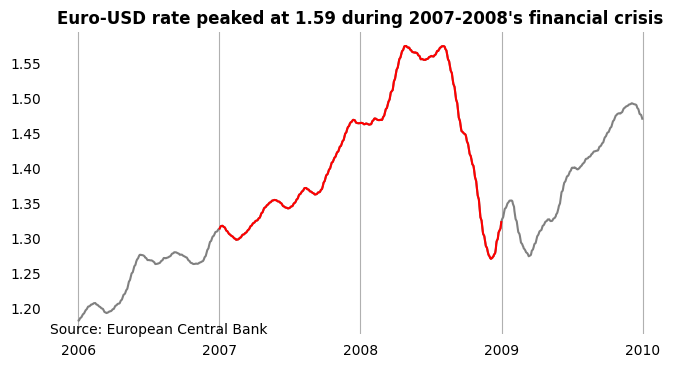

In [17]:
fig = plt.figure(figsize = (8,4))
ax = fig.add_subplot()

plt.plot(df['Time'], df['rolling_mean'], color='grey')
plt.title("Euro-USD rate peaked at 1.59 during 2007-2008's financial crisis", weight = 'bold')

highlight = euro_to_dollar[(euro_to_dollar['Time'] > '2006-12-31') & (euro_to_dollar['Time'] < '2009-01-01')]
plt.plot(highlight['Time'], highlight['rolling_mean'], color='red')

ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.tick_params(bottom=False, left=False)

date_form = DateFormatter("%Y")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.YearLocator())
plt.grid(axis='x')
ax.text(x=0,y=0, s="Source: European Central Bank", transform=ax.transAxes)

plt.show()

The exchange rate from Euros to Dollars was the highest in mid-2008 at the height of the financial crisis. The rate was climbing 